###### Star Type Classification
For comparing all models of ML
It can be used for prediction

Temperature -- K

L -- L/Lo

R -- R/Ro

AM -- Mv

Color -- General Color of Spectrum

Spectral_Class -- O,B,A,F,G,K,M / SMASS - https://en.wikipedia.org/wiki/Asteroid_spectral_types

Type -- Red Dwarf, Brown Dwarf, White Dwarf, Main Sequence , Super Giants, Hyper Giants

TARGET:
Type

from 0 to 5

Red Dwarf - 0
Brown Dwarf - 1
White Dwarf - 2
Main Sequence - 3
Super Giants - 4
Hyper Giants - 5

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('Stars.csv')
df.head()

,Temperature,L,R,A_M,Color,Spectral_Class,Type
0,3068,0.002400,0.1700,16.12,Red,M,0
1,3042,0.000500,0.1542,16.60,Red,M,0
2,2600,0.000300,0.1020,18.70,Red,M,0
3,2800,0.000200,0.1600,16.65,Red,M,0
4,1939,0.000138,0.1030,20.06,Red,M,0


###### Data Exploration and Data Visualization

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Temperature     240 non-null    int64  
 1   L               240 non-null    float64
 2   R               240 non-null    float64
 3   A_M             240 non-null    float64
 4   Color           240 non-null    object 
 5   Spectral_Class  240 non-null    object 
 6   Type            240 non-null    int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 13.2+ KB


In [4]:
df.describe()

,Temperature,L,R,A_M,Type
count,240.000000,240.000000,240.000000,240.000000,240.000000
mean,10497.462500,107188.361635,237.157781,4.382396,2.500000
std,9552.425037,179432.244940,517.155763,10.532512,1.711394
min,1939.000000,0.000080,0.008400,-11.920000,0.000000
25%,3344.250000,0.000865,0.102750,-6.232500,1.000000
50%,5776.000000,0.070500,0.762500,8.313000,2.500000
75%,15055.500000,198050.000000,42.750000,13.697500,4.000000
max,40000.000000,849420.000000,1948.500000,20.060000,5.000000


<AxesSubplot:>

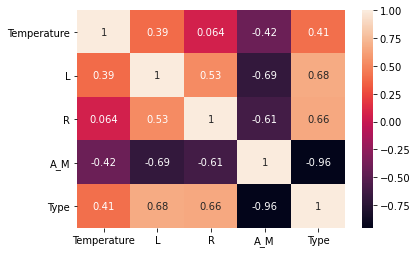

In [6]:
sns.heatmap(df.corr(),annot=True)

<AxesSubplot:xlabel='Temperature', ylabel='Count'>

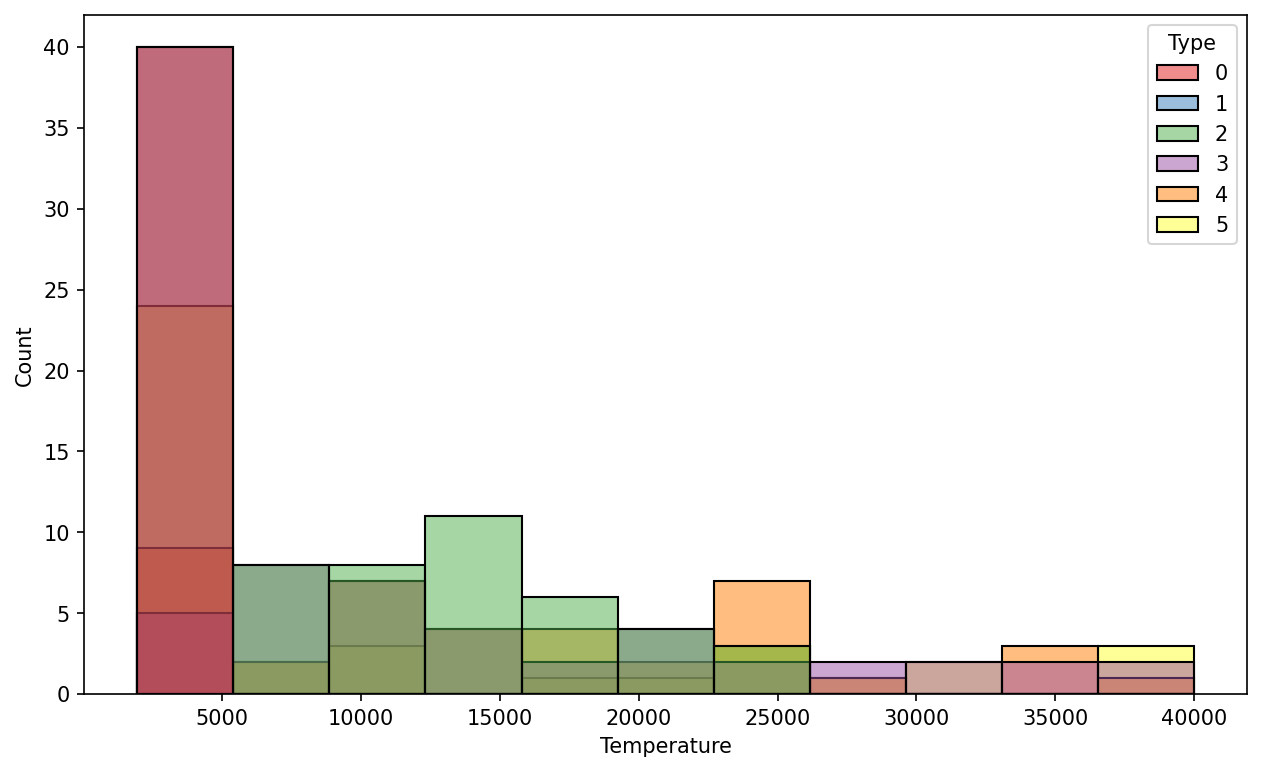

In [20]:
plt.figure(figsize=(10,6),dpi=150)
sns.histplot(x=df['Temperature'],hue=df['Type'],palette='Set1')

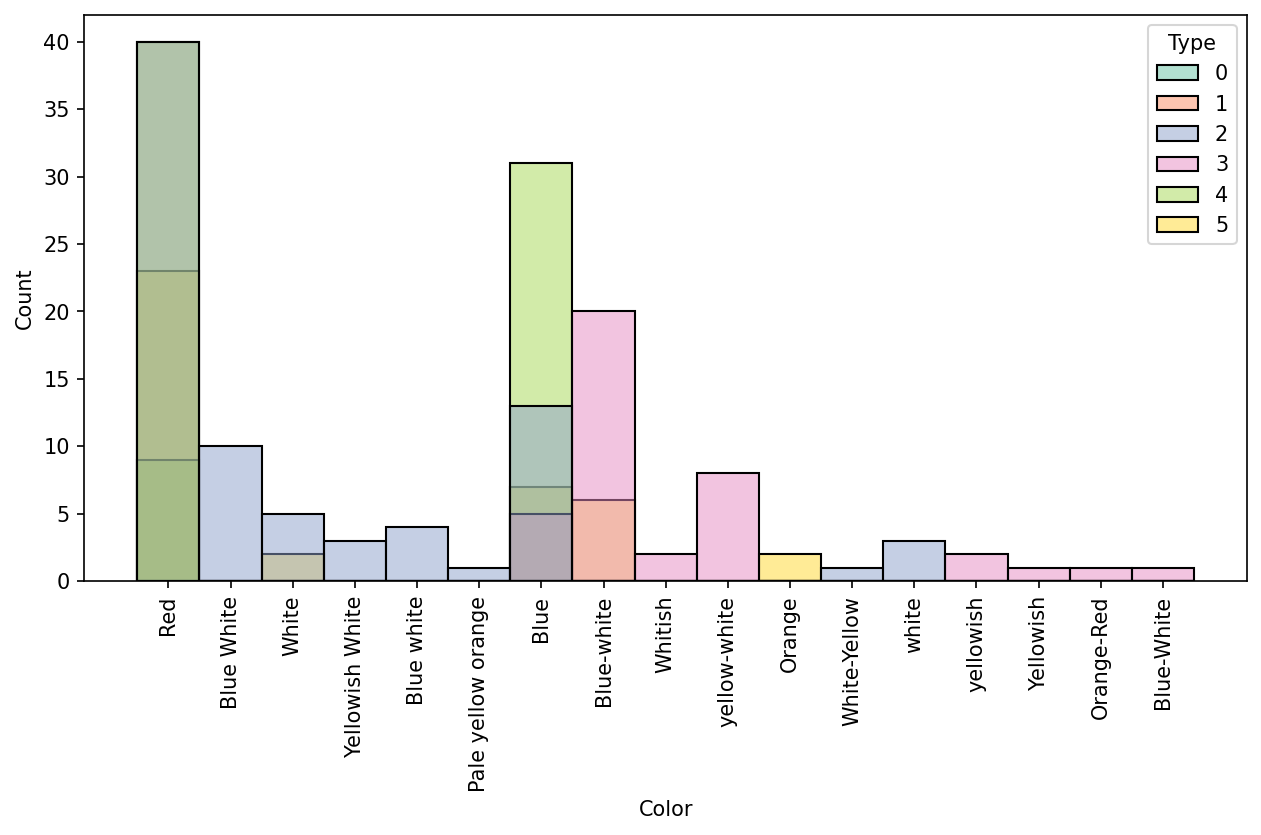

In [24]:
plt.figure(figsize=(10,5),dpi=150)
sns.histplot(x=df['Color'],hue=df['Type'],palette='Set2')
plt.xticks(rotation=90);

<AxesSubplot:xlabel='L', ylabel='Count'>

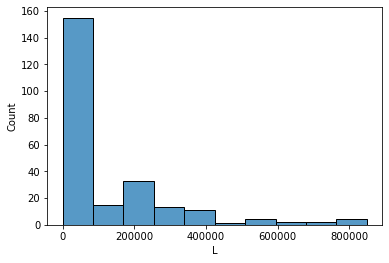

In [29]:
sns.histplot(df['L'],bins=10)

<AxesSubplot:xlabel='R', ylabel='Count'>

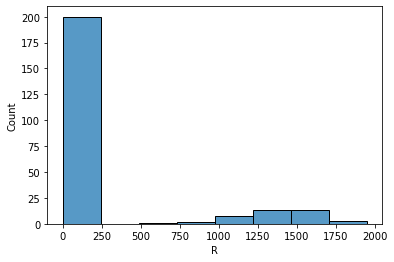

In [32]:
sns.histplot(df['R'],bins=8)

<AxesSubplot:xlabel='A_M', ylabel='Count'>

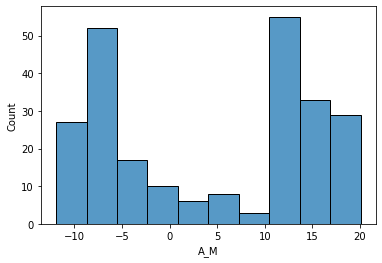

In [37]:
sns.histplot(df['A_M'],bins=10)

<Figure size 600x400 with 0 Axes>

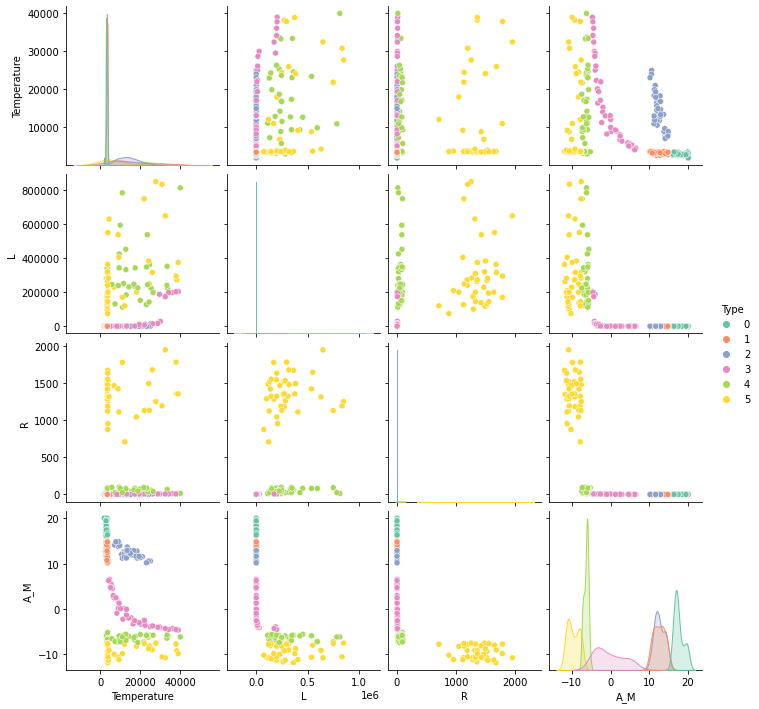

In [52]:
plt.figure(dpi=100)
sns.pairplot(df,hue='Type',palette='Set2',diag_kind='kde')

###### Modelling

In [55]:
X=pd.get_dummies(df.drop('Type',axis=1))

In [56]:
y=df['Type']

In [57]:
from sklearn.model_selection import train_test_split

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

In [59]:
from sklearn.preprocessing import StandardScaler

In [60]:
scaler=StandardScaler()

In [61]:
X_train=scaler.fit_transform(X_train)

In [62]:
X_test=scaler.transform(X_test)

In [64]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [65]:
log_model=LogisticRegression()
log_model.fit(X_train,y_train)

LogisticRegression()

In [66]:
knn_model=KNeighborsClassifier()
knn_model.fit(X_train,y_train)

KNeighborsClassifier()

In [67]:
rfc_model=RandomForestClassifier()
rfc_model.fit(X_train,y_train)

RandomForestClassifier()

In [68]:
gbc_model=GradientBoostingClassifier()
gbc_model.fit(X_train,y_train)

GradientBoostingClassifier()

###### Model Evaluation

In [71]:
from sklearn.metrics import plot_confusion_matrix,classification_report

In [72]:
def report(model):
    preds = model.predict(X_test)
    print(classification_report(preds,y_test))
    plot_confusion_matrix(model,X_test,y_test)

LOGISTIC REGRESSION
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         6
           3       1.00      1.00      1.00        15
           4       1.00      1.00      1.00         4
           5       1.00      1.00      1.00         8

    accuracy                           1.00        48
   macro avg       1.00      1.00      1.00        48
weighted avg       1.00      1.00      1.00        48



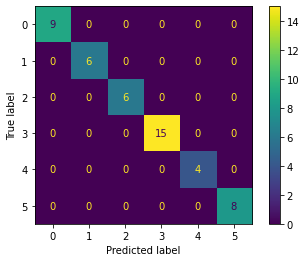

In [73]:
print('LOGISTIC REGRESSION')
report(log_model)

KNN MODEL
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      0.67      0.80         9
           2       0.83      0.83      0.83         6
           3       0.87      0.81      0.84        16
           4       0.75      1.00      0.86         3
           5       0.62      1.00      0.77         5

    accuracy                           0.85        48
   macro avg       0.85      0.89      0.85        48
weighted avg       0.88      0.85      0.85        48



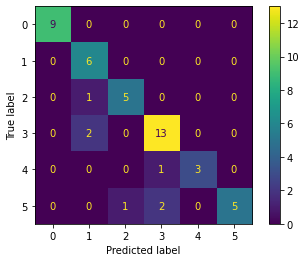

In [74]:
print('KNN MODEL')
report(knn_model)

RANDOM FOREST CLASSIFIER
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         6
           3       1.00      1.00      1.00        15
           4       1.00      1.00      1.00         4
           5       1.00      1.00      1.00         8

    accuracy                           1.00        48
   macro avg       1.00      1.00      1.00        48
weighted avg       1.00      1.00      1.00        48



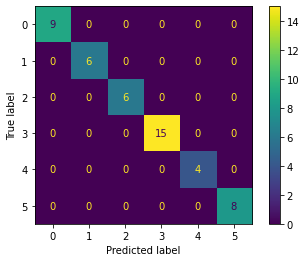

In [75]:
print('RANDOM FOREST CLASSIFIER')
report(rfc_model)

GRADIENT BOOSTING CLASSIFIER
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         6
           3       1.00      1.00      1.00        15
           4       1.00      1.00      1.00         4
           5       1.00      1.00      1.00         8

    accuracy                           1.00        48
   macro avg       1.00      1.00      1.00        48
weighted avg       1.00      1.00      1.00        48



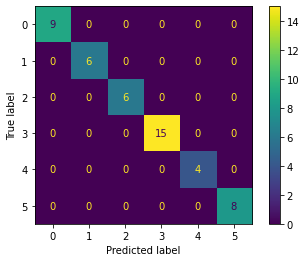

In [76]:
print('GRADIENT BOOSTING CLASSIFIER')
report(gbc_model)

From the above model evaluation we see that Logistic Regression, Random Forest Classifier and Gradient Boosting Classifier performed well and any of these can we used for classification.